# Data Wrangling

In [1]:
# import modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In this project, I am going to be looking at tornado event data, as well as the corresponding weather data. First, I must explore tornado datasets to figure out the best location to focus my analysis.

In [2]:
# import tornado data from 3 seperate CSV files and concatenate them into 1 file
csv_files = ['/Users/gregoryolson/Documents/Data Science CT/Capstone/Capstone_Tornado/Data/tornados_2020_1.csv', \
             '/Users/gregoryolson/Documents/Data Science CT/Capstone/Capstone_Tornado/Data/tornados_2020_2.csv', \
             '/Users/gregoryolson/Documents/Data Science CT/Capstone/Capstone_Tornado/Data/tornados_2020_3.csv']
tornado_2020 = pd.concat((pd.read_csv(f) for f in csv_files))
tornado_2020.head()

,EVENT_ID,CZ_NAME_STR,BEGIN_LOCATION,BEGIN_DATE,BEGIN_TIME,EVENT_TYPE,MAGNITUDE,TOR_F_SCALE,DEATHS_DIRECT,INJURIES_DIRECT,...,END_RANGE,END_AZIMUTH,END_LOCATION,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON,EVENT_NARRATIVE,EPISODE_NARRATIVE,ABSOLUTE_ROWNUMBER
0,865220,LAKE CO.,OKAHUMPKA,01/04/2020,1029,Tornado,,EF0,0,1,...,1,NW,OKAHUMPKA,28.7399,-81.9234,28.7589,-81.8907,National Weather Service staff conducted a dam...,A severe thunderstorm moving across central Fl...,1
1,865221,VOLUSIA CO.,BERESFORD,01/04/2020,1126,Tornado,,EF1,0,0,...,1,ESE,DE LAND,29.0023,-81.3514,29.0264,-81.2841,National Weather Service staff conducted a dam...,A severe thunderstorm moving across central Fl...,2
2,874056,LINCOLN CO.,PRAGUE,01/10/2020,1034,Tornado,,EF0,0,0,...,1,NNE,PRAGUE,35.4864,-96.6952,35.5013,-96.6814,A small tornado developed on the west side of ...,A strong storm system brought an unseasonably ...,3
3,874086,MAYES CO.,MURPHY,01/10/2020,1155,Tornado,,EFU,0,0,...,5,ESE,MURPHY,36.0991,-95.1771,36.1163,-95.1659,Storm chasers positioned in two different loca...,A strong storm system and associated cold fron...,4
4,872580,CEDAR CO.,MASTERS,01/10/2020,1427,Tornado,,EF1,0,0,...,3,ENE,MASTERS,37.6057,-93.6194,37.6110,-93.6147,A National Weather Service survey determined t...,"During the afternoon and evening of the 10th, ...",5


This dataset contains information about every reported tornado in the United States between January 1, 2020 and August 31, 2020. 

In [3]:
# return the number of rows in the data frame
len(tornado_2020.index)

1107

In [4]:
# return information about the columns of tornado_2020
tornado_2020.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1107 entries, 0 to 496
Data columns (total 37 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   EVENT_ID             1107 non-null   int64  
 1   CZ_NAME_STR          1107 non-null   object 
 2   BEGIN_LOCATION       1107 non-null   object 
 3   BEGIN_DATE           1107 non-null   object 
 4   BEGIN_TIME           1107 non-null   int64  
 5   EVENT_TYPE           1107 non-null   object 
 6   MAGNITUDE            1107 non-null   object 
 7   TOR_F_SCALE          1107 non-null   object 
 8   DEATHS_DIRECT        1107 non-null   int64  
 9   INJURIES_DIRECT      1107 non-null   int64  
 10  DAMAGE_PROPERTY_NUM  1107 non-null   int64  
 11  DAMAGE_CROPS_NUM     1107 non-null   int64  
 12  STATE_ABBR           1107 non-null   object 
 13  CZ_TIMEZONE          1107 non-null   object 
 14  MAGNITUDE_TYPE       1107 non-null   object 
 15  EPISODE_ID           1107 non-null   in

In [5]:
# explore the STATE_ABBR column to see which states have had the most tornado events
tornado_2020['STATE_ABBR'].value_counts()[:15].index.tolist()

['MS',
 'TX',
 'AL',
 'IL',
 'MN',
 'GA',
 'SC',
 'FL',
 'LA',
 'NC',
 'AR',
 'TN',
 'OK',
 'CO',
 'IA']

In [6]:
# and what are the corresponding frequencies of these 15 states
tornado_2020['STATE_ABBR'].value_counts()[:15].tolist()

[96, 86, 78, 65, 64, 64, 54, 52, 49, 44, 42, 39, 39, 34, 31]

The number 1 state is Mississippi with 96 tornadoes, and compared to Texas, the second most frequent state, it is less than a fifth of the area, so the events are occuring in a much denser geographic region. This is very promising.

Next, I will import weather data from all of the weather stations with data in Mississippi in 2020.

In [7]:
# import mississippi weather data 
ms_weather_2020 = pd.read_csv('/Users/gregoryolson/Documents/Data Science CT/Capstone/Capstone_Tornado/Data/ms_weather_2020.csv')
ms_weather_2020.head()

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,DEWP,DEWP_ATTRIBUTES,FRSHTT,FRSHTT_ATTRIBUTES,...,SNDP,SNDP_ATTRIBUTES,STP,STP_ATTRIBUTES,TEMP,TEMP_ATTRIBUTES,VISIB,VISIB_ATTRIBUTES,WDSP,WDSP_ATTRIBUTES
0,72235893919,"MCCOMB AIRPORT, MS US",31.1827,-90.4708,125.9,2020-01-01,33.9,24,0,NaN,...,999.9,NaN,3.6,23,44.4,24,9.9,24,2.2,24
1,72235893919,"MCCOMB AIRPORT, MS US",31.1827,-90.4708,125.9,2020-01-02,58.1,24,10000,NaN,...,999.9,NaN,994.1,24,62.4,24,7.4,24,8.4,24
2,72235893919,"MCCOMB AIRPORT, MS US",31.1827,-90.4708,125.9,2020-01-03,58.7,24,10000,NaN,...,999.9,NaN,995.0,23,60.8,24,9.2,24,3.9,24
3,72235893919,"MCCOMB AIRPORT, MS US",31.1827,-90.4708,125.9,2020-01-04,45.8,24,100000,NaN,...,999.9,NaN,4.9,23,55.9,24,8.5,24,8.4,24
4,72235893919,"MCCOMB AIRPORT, MS US",31.1827,-90.4708,125.9,2020-01-05,35.9,24,0,NaN,...,999.9,NaN,12.6,23,45.6,24,9.6,24,2.2,24


In [8]:
# explore the columns
ms_weather_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10754 entries, 0 to 10753
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   STATION            10754 non-null  int64  
 1   NAME               10754 non-null  object 
 2   LATITUDE           10754 non-null  float64
 3   LONGITUDE          10754 non-null  float64
 4   ELEVATION          10754 non-null  float64
 5   DATE               10754 non-null  object 
 6   DEWP               10754 non-null  float64
 7   DEWP_ATTRIBUTES    10754 non-null  int64  
 8   FRSHTT             10754 non-null  int64  
 9   FRSHTT_ATTRIBUTES  0 non-null      float64
 10  GUST               10754 non-null  float64
 11  GUST_ATTRIBUTES    0 non-null      float64
 12  MAX                10754 non-null  float64
 13  MAX_ATTRIBUTES     10754 non-null  object 
 14  MIN                10754 non-null  float64
 15  MIN_ATTRIBUTES     10754 non-null  object 
 16  MXSPD              107

In [9]:
# see how many weather stations are sourcing data
len(ms_weather_2020.NAME.unique().tolist())

34

This is daily weather data from 34 different weather stations in Mississippi from the year 2020. While this is nice, there were only 96 tornadoes reported in the state in the 8 month period I looked at, so the next step is to broaden the timeframe to almost 5 years, from 01/01/2016 to 08/31/2020. This will require importing the tornado event data from this timeframe, as well as the appropriate daily summaries for all available Mississippi weather stations. Once this is completed, I can begin to clean the data and combine it into one large dataframe.

In [10]:
# import the dataset containing Mississippi tornado events from 01/01/16 - 08/31/20
tornado_ms = pd.read_csv('/Users/gregoryolson/Documents/Data Science CT/Capstone/Capstone_Tornado/Data/tornado_ms.csv')
tornado_ms.head()

,EVENT_ID,CZ_NAME_STR,BEGIN_LOCATION,BEGIN_DATE,BEGIN_TIME,EVENT_TYPE,MAGNITUDE,TOR_F_SCALE,DEATHS_DIRECT,INJURIES_DIRECT,...,END_RANGE,END_AZIMUTH,END_LOCATION,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON,EVENT_NARRATIVE,EPISODE_NARRATIVE,ABSOLUTE_ROWNUMBER
0,609831,COPIAH CO.,BEECH GROVE,01/21/2016,1614,Tornado,,EF0,0,0,...,1,SE,BEECH GROVE,31.9388,-90.2981,31.9662,-90.2578,This weak tornado touched down along Bennett R...,Abundant moisture and instability combined wit...,1
1,618151,LINCOLN CO.,NEW SIGHT,01/21/2016,1625,Tornado,,EF0,0,0,...,5,NW,NEW SIGHT,31.6919,-90.5363,31.6989,-90.5212,This weak tornado touched down just north of t...,Abundant moisture and instability combined wit...,2
2,618152,COPIAH CO.,PEETSVILLE,01/21/2016,1626,Tornado,,EF1,0,0,...,4,WNW,BEAUREGARD,31.6989,-90.5212,31.7334,-90.4597,This weak tornado touched down just north of t...,Abundant moisture and instability combined wit...,3
3,609832,SIMPSON CO.,BUSH,01/21/2016,1720,Tornado,,EF1,0,0,...,2,NE,PINOLA,31.8656,-90.0125,31.8835,-89.9496,The tornado started off of Highway 472 where i...,Abundant moisture and instability combined wit...,4
4,609833,SCOTT CO.,HOMEWOOD,01/21/2016,1746,Tornado,,EF0,0,0,...,3,NNE,HOMEWOOD,32.2624,-89.5387,32.2645,-89.5030,This weak tornado snapped a handful of large p...,Abundant moisture and instability combined wit...,5


In [11]:
# see how many entries are in the dat
tornado_ms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 37 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   EVENT_ID             450 non-null    int64  
 1   CZ_NAME_STR          450 non-null    object 
 2   BEGIN_LOCATION       450 non-null    object 
 3   BEGIN_DATE           450 non-null    object 
 4   BEGIN_TIME           450 non-null    int64  
 5   EVENT_TYPE           450 non-null    object 
 6   MAGNITUDE            450 non-null    object 
 7   TOR_F_SCALE          450 non-null    object 
 8   DEATHS_DIRECT        450 non-null    int64  
 9   INJURIES_DIRECT      450 non-null    int64  
 10  DAMAGE_PROPERTY_NUM  450 non-null    int64  
 11  DAMAGE_CROPS_NUM     450 non-null    int64  
 12  STATE_ABBR           450 non-null    object 
 13  CZ_TIMEZONE          450 non-null    object 
 14  MAGNITUDE_TYPE       450 non-null    object 
 15  EPISODE_ID           450 non-null    int

In [12]:
# check if there are any missing values in the data
tornado_ms.isna().sum()

EVENT_ID               0
CZ_NAME_STR            0
BEGIN_LOCATION         0
BEGIN_DATE             0
BEGIN_TIME             0
EVENT_TYPE             0
MAGNITUDE              0
TOR_F_SCALE            0
DEATHS_DIRECT          0
INJURIES_DIRECT        0
DAMAGE_PROPERTY_NUM    0
DAMAGE_CROPS_NUM       0
STATE_ABBR             0
CZ_TIMEZONE            0
MAGNITUDE_TYPE         0
EPISODE_ID             0
CZ_TYPE                0
CZ_FIPS                0
WFO                    0
INJURIES_INDIRECT      0
DEATHS_INDIRECT        0
SOURCE                 0
FLOOD_CAUSE            0
TOR_LENGTH             0
TOR_WIDTH              0
BEGIN_RANGE            0
BEGIN_AZIMUTH          0
END_RANGE              0
END_AZIMUTH            0
END_LOCATION           0
BEGIN_LAT              0
BEGIN_LON              0
END_LAT                0
END_LON                0
EVENT_NARRATIVE        0
EPISODE_NARRATIVE      0
ABSOLUTE_ROWNUMBER     0
dtype: int64

This makes it seem as though every value is non-empty, but a quick glance at the head of the dataframe reveals that the MAGNITUDE column has some blank values. Let's explore how many columns contain values as such.

In [13]:
# loop through every column to check for blank values
for column in tornado_ms:
    num = len(tornado_ms.loc[tornado_ms[column] == ' '])
    if num > 0:
        print(column, ': ', num)

MAGNITUDE :  450
MAGNITUDE_TYPE :  450
FLOOD_CAUSE :  450


In [14]:
# do the same thing for 0 values
for column in tornado_ms:
    num = len(tornado_ms.loc[tornado_ms[column] == 0])
    if num > 0:
        print(column, ': ', num)

BEGIN_TIME :  1
DEATHS_DIRECT :  442
INJURIES_DIRECT :  427
DAMAGE_PROPERTY_NUM :  58
DAMAGE_CROPS_NUM :  397
INJURIES_INDIRECT :  447
DEATHS_INDIRECT :  448
BEGIN_RANGE :  24
END_RANGE :  15


All 3 columns with ' ' values are completely void of data, so they can be dumped. As for the 0 values, there are 4 such columns with less than 10% being non-zero, and these attributes like number of deaths and injuries are effects of the tornados, so it would be appropriate to get rid of these columns as well.

In [15]:
# drop the 3 columns with no data, as well as the 4 columns with a significant number of 0 values
tornado_ms.drop(['MAGNITUDE', 'MAGNITUDE_TYPE', 'FLOOD_CAUSE', 'DEATHS_DIRECT', \
                 'INJURIES_DIRECT', 'INJURIES_INDIRECT', 'DEATHS_INDIRECT'], axis=1, inplace=True)
tornado_ms.head()

,EVENT_ID,CZ_NAME_STR,BEGIN_LOCATION,BEGIN_DATE,BEGIN_TIME,EVENT_TYPE,TOR_F_SCALE,DAMAGE_PROPERTY_NUM,DAMAGE_CROPS_NUM,STATE_ABBR,...,END_RANGE,END_AZIMUTH,END_LOCATION,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON,EVENT_NARRATIVE,EPISODE_NARRATIVE,ABSOLUTE_ROWNUMBER
0,609831,COPIAH CO.,BEECH GROVE,01/21/2016,1614,Tornado,EF0,17000,0,MS,...,1,SE,BEECH GROVE,31.9388,-90.2981,31.9662,-90.2578,This weak tornado touched down along Bennett R...,Abundant moisture and instability combined wit...,1
1,618151,LINCOLN CO.,NEW SIGHT,01/21/2016,1625,Tornado,EF0,10000,0,MS,...,5,NW,NEW SIGHT,31.6919,-90.5363,31.6989,-90.5212,This weak tornado touched down just north of t...,Abundant moisture and instability combined wit...,2
2,618152,COPIAH CO.,PEETSVILLE,01/21/2016,1626,Tornado,EF1,155000,0,MS,...,4,WNW,BEAUREGARD,31.6989,-90.5212,31.7334,-90.4597,This weak tornado touched down just north of t...,Abundant moisture and instability combined wit...,3
3,609832,SIMPSON CO.,BUSH,01/21/2016,1720,Tornado,EF1,17000,0,MS,...,2,NE,PINOLA,31.8656,-90.0125,31.8835,-89.9496,The tornado started off of Highway 472 where i...,Abundant moisture and instability combined wit...,4
4,609833,SCOTT CO.,HOMEWOOD,01/21/2016,1746,Tornado,EF0,9000,0,MS,...,3,NNE,HOMEWOOD,32.2624,-89.5387,32.2645,-89.5030,This weak tornado snapped a handful of large p...,Abundant moisture and instability combined wit...,5


In [16]:
# make sure that there aren't any obvious outliers
tornado_ms.describe()

,EVENT_ID,BEGIN_TIME,DAMAGE_PROPERTY_NUM,DAMAGE_CROPS_NUM,EPISODE_ID,CZ_FIPS,TOR_LENGTH,TOR_WIDTH,BEGIN_RANGE,END_RANGE,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON,ABSOLUTE_ROWNUMBER
count,450.000000,450.000000,4.500000e+02,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000
mean,780883.484444,1273.371111,2.446780e+05,20174.444444,129707.100000,85.026667,4.728356,371.064978,2.920000,3.035556,32.409740,-89.620578,32.444530,-89.557941,225.500000
std,90010.183289,568.587311,9.430799e+05,91607.489848,14451.231014,45.170296,5.018368,471.236394,3.713312,4.366156,1.085854,0.740019,1.085932,0.736148,130.048068
min,609831.000000,0.000000,0.000000e+00,0.000000,101941.000000,1.000000,0.010000,1.910000,0.000000,0.000000,30.330200,-91.425500,30.346700,-91.412000,1.000000
25%,692058.500000,824.750000,1.000000e+04,0.000000,115032.000000,49.000000,1.302500,100.000000,1.000000,1.000000,31.676600,-90.147750,31.707475,-90.082575,113.250000
50%,813811.500000,1431.000000,3.000000e+04,0.000000,135634.000000,85.000000,2.920000,200.000000,2.000000,2.000000,32.335200,-89.595750,32.359250,-89.528900,225.500000
75%,865265.750000,1640.500000,1.137500e+05,0.000000,144130.000000,123.000000,6.202500,447.500000,4.000000,3.000000,33.027175,-89.033525,33.052300,-88.943575,337.750000
max,918673.000000,2357.000000,1.500000e+07,800000.000000,152501.000000,163.000000,32.160000,3960.000000,59.000000,60.000000,34.953600,-88.195700,34.960500,-88.130000,450.000000


In [17]:
# import the weather data
weather_ms = pd.read_csv('/Users/gregoryolson/Documents/Data Science CT/Capstone/Capstone_Tornado/Data/weather_ms.csv')
weather_ms.head()

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,DEWP,DEWP_ATTRIBUTES,FRSHTT,FRSHTT_ATTRIBUTES,...,SNDP,SNDP_ATTRIBUTES,STP,STP_ATTRIBUTES,TEMP,TEMP_ATTRIBUTES,VISIB,VISIB_ATTRIBUTES,WDSP,WDSP_ATTRIBUTES
0,72235893919,"MCCOMB PIKE COUNTY JOHN E LEWIS FIELD AIRPORT,...",31.1827,-90.4708,125.9,2016-01-01,36.2,24,10000,NaN,...,999.9,NaN,10.7,23,45.5,24,9.9,24,9.3,24
1,72235893919,"MCCOMB PIKE COUNTY JOHN E LEWIS FIELD AIRPORT,...",31.1827,-90.4708,125.9,2016-01-02,31.7,24,0,NaN,...,999.9,NaN,12.1,23,43.5,24,10.0,24,6.5,24
2,72235893919,"MCCOMB PIKE COUNTY JOHN E LEWIS FIELD AIRPORT,...",31.1827,-90.4708,125.9,2016-01-03,35.2,24,10000,NaN,...,999.9,NaN,7.4,23,46.2,24,10.0,24,3.9,24
3,72235893919,"MCCOMB PIKE COUNTY JOHN E LEWIS FIELD AIRPORT,...",31.1827,-90.4708,125.9,2016-01-04,32.7,24,0,NaN,...,999.9,NaN,7.9,23,44.9,24,10.0,24,6.9,24
4,72235893919,"MCCOMB PIKE COUNTY JOHN E LEWIS FIELD AIRPORT,...",31.1827,-90.4708,125.9,2016-01-05,27.3,24,0,NaN,...,999.9,NaN,12.2,23,39.2,24,10.0,24,4.5,24


In [18]:
# there should be close to 50000 rows in the data
weather_ms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49897 entries, 0 to 49896
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   STATION            49897 non-null  int64  
 1   NAME               49897 non-null  object 
 2   LATITUDE           49897 non-null  float64
 3   LONGITUDE          49897 non-null  float64
 4   ELEVATION          49897 non-null  float64
 5   DATE               49897 non-null  object 
 6   DEWP               49897 non-null  float64
 7   DEWP_ATTRIBUTES    49897 non-null  int64  
 8   FRSHTT             49897 non-null  int64  
 9   FRSHTT_ATTRIBUTES  0 non-null      float64
 10  GUST               49897 non-null  float64
 11  GUST_ATTRIBUTES    0 non-null      float64
 12  MAX                49897 non-null  float64
 13  MAX_ATTRIBUTES     49897 non-null  object 
 14  MIN                49897 non-null  float64
 15  MIN_ATTRIBUTES     49897 non-null  object 
 16  MXSPD              498

A quick glance at the data shows that the columns ending in ATTRIBUTES are either filled with the same number or no number at all. They don't really provide any useful information.

In [19]:
# create a new data frame without the ATTRIBUTES columns
cols = [c for c in weather_ms.columns if c[-10:] != 'ATTRIBUTES']
weather_ms = weather_ms[cols]
weather_ms.head()

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,DEWP,FRSHTT,GUST,MAX,MIN,MXSPD,PRCP,SLP,SNDP,STP,TEMP,VISIB,WDSP
0,72235893919,"MCCOMB PIKE COUNTY JOHN E LEWIS FIELD AIRPORT,...",31.1827,-90.4708,125.9,2016-01-01,36.2,10000,20.0,52.0,41.0,12.0,0.08,1026.1,999.9,10.7,45.5,9.9,9.3
1,72235893919,"MCCOMB PIKE COUNTY JOHN E LEWIS FIELD AIRPORT,...",31.1827,-90.4708,125.9,2016-01-02,31.7,0,999.9,51.1,39.9,8.9,0.01,1027.7,999.9,12.1,43.5,10.0,6.5
2,72235893919,"MCCOMB PIKE COUNTY JOHN E LEWIS FIELD AIRPORT,...",31.1827,-90.4708,125.9,2016-01-03,35.2,10000,999.9,54.0,42.1,8.0,0.00,1022.8,999.9,7.4,46.2,10.0,3.9
3,72235893919,"MCCOMB PIKE COUNTY JOHN E LEWIS FIELD AIRPORT,...",31.1827,-90.4708,125.9,2016-01-04,32.7,0,17.1,55.0,37.0,12.0,0.00,1023.3,999.9,7.9,44.9,10.0,6.9
4,72235893919,"MCCOMB PIKE COUNTY JOHN E LEWIS FIELD AIRPORT,...",31.1827,-90.4708,125.9,2016-01-05,27.3,0,999.9,54.0,28.9,8.0,0.00,1027.7,999.9,12.2,39.2,10.0,4.5


In [20]:
# check the statistical attributes of each column
weather_ms.describe()

,STATION,LATITUDE,LONGITUDE,ELEVATION,DEWP,FRSHTT,GUST,MAX,MIN,MXSPD,PRCP,SLP,SNDP,STP,TEMP,VISIB,WDSP
count,4.989700e+04,49897.000000,49897.000000,49897.000000,49897.000000,49897.000000,49897.000000,49897.000000,49897.000000,49897.000000,49897.000000,49897.000000,4.989700e+04,49897.000000,49897.000000,49897.000000,49897.000000
mean,7.532555e+10,32.705381,-89.559735,75.581441,755.647402,12308.603744,468.188530,87.593040,66.211129,85.202720,12.558744,5418.971381,9.999000e+02,224.767762,65.553103,110.412023,75.938884
std,7.966055e+09,1.432328,0.861786,40.721230,2542.178844,29563.326504,488.073892,323.541192,314.980940,259.505629,32.990386,4490.159342,2.273760e-13,407.656330,14.357920,300.063760,256.120462
min,7.205415e+10,30.350000,-91.283330,5.000000,-23.200000,0.000000,9.900000,19.400000,-0.400000,1.000000,0.000000,990.300000,9.999000e+02,0.000000,8.700000,0.500000,0.000000
25%,7.221656e+10,31.606000,-90.346670,42.700000,46.600000,0.000000,19.000000,68.000000,44.600000,8.900000,0.000000,1017.200000,9.999000e+02,6.600000,55.000000,9.000000,2.900000
50%,7.223589e+10,32.337800,-89.434800,80.500000,61.900000,0.000000,28.900000,80.100000,59.000000,11.100000,0.000000,1030.400000,9.999000e+02,11.800000,68.300000,9.900000,4.700000
75%,7.475709e+10,33.861130,-88.744200,104.200000,71.600000,10000.000000,999.900000,89.100000,69.800000,15.000000,0.110000,9999.900000,9.999000e+02,21.900000,78.100000,10.000000,7.300000
max,9.999996e+10,34.978610,-88.416667,164.600000,9999.900000,111000.000000,999.900000,9999.900000,9999.900000,999.900000,99.990000,9999.900000,9.999000e+02,999.900000,93.200000,999.900000,999.900000


A few observations: Most of the max values are 99.99 or 999.9 or 9999.9 which represent missing data according to the NCEI documentation. Also, the FRSHTT column has a strange distribution which can be investigated by looking at the total number of unique values in the column.

In [21]:
# return unique values from the FRSHTT column
weather_ms.FRSHTT.unique()

array([ 10000,      0, 100000,  10010,  11010, 110010, 110000,  11000,
       111000,   1000,     10, 101000, 100010, 110110,  10011,  11110])

After researching the FRSHTT column, it is the indicator column, with 6 digit numbers representing the occurence of Fog, Rain, Snow, Hail, Thunder, and Tornado. A 1 value indicates an event occurence and a 0 represent no such occurence.

In [22]:
# check for missing values in the weather_ms dataset
for column in weather_ms:
    num = len(weather_ms.loc[(weather_ms[column] == 99.99) | \
                             (weather_ms[column] == 999.9) | \
                             (weather_ms[column] == 9999.9)])
    print(column, ': ', num)

STATION :  0
NAME :  0
LATITUDE :  0
LONGITUDE :  0
ELEVATION :  0
DATE :  0
DEWP :  3508
FRSHTT :  0
GUST :  22816
MAX :  53
MIN :  50
MXSPD :  3716
PRCP :  6218
SLP :  24449
SNDP :  49897
STP :  7181
TEMP :  0
VISIB :  5098
WDSP :  3560


There are 11 columns that have missing values, and they are all weather measurements. One such column, SNDP, has only '999.9' values, so this can be removed from the data. As for the others, the missing values must be appropriately dealt with.

In [23]:
# drop the SNDP column
weather_ms = weather_ms.drop('SNDP', axis=1)

The dataset documentation states that missing values are replaced by 999.9 or similar type values. Thus I can assume that all such values are missing and convert them to NaN values.

In [24]:
# replace missing values with NaN values
weather_ms.replace([99.99, 999.9, 9999.9], np.nan, inplace=True)

In [25]:
# after looking at STP values, they have a lot of variations of missing values in the 990.0-999.9 range,
# so these values can be dealt with by masking the range
weather_ms['STP'] = weather_ms['STP'].mask(weather_ms['STP'] > 500, np.nan)

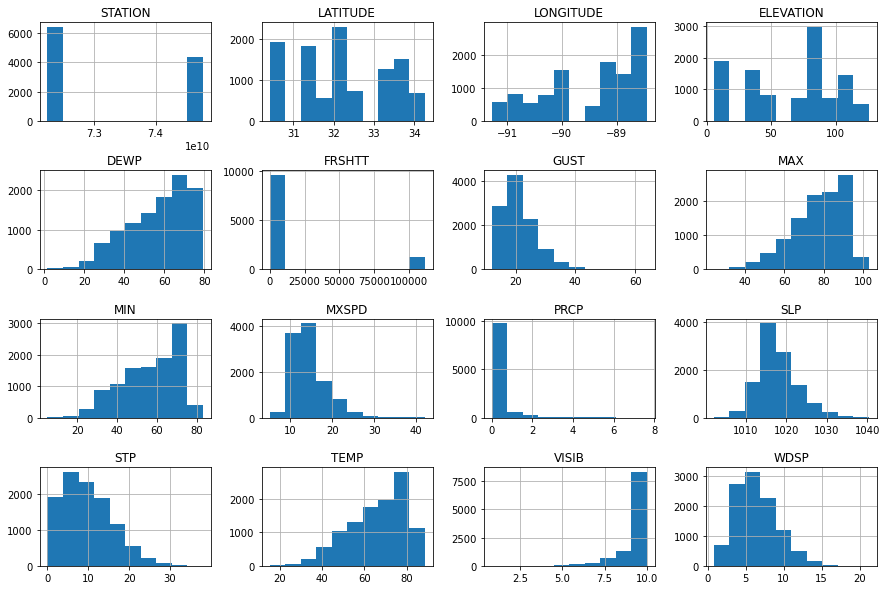

In [26]:
# plot histograms of each column without NaN values
weather_ms.dropna().hist(figsize=(15,10))
plt.subplots_adjust(hspace=0.5);

There doesn't seem to be anything too unusual here.

In [27]:
# check the maximum values to see if they are more appropriate
weather_ms.describe()

,STATION,LATITUDE,LONGITUDE,ELEVATION,DEWP,FRSHTT,GUST,MAX,MIN,MXSPD,PRCP,SLP,STP,TEMP,VISIB,WDSP
count,4.989700e+04,49897.000000,49897.000000,49897.000000,46389.000000,49897.000000,27081.000000,49844.00000,49847.000000,46181.000000,43679.000000,25448.000000,39066.000000,49897.000000,44799.000000,46337.000000
mean,7.532555e+10,32.705381,-89.559735,75.581441,56.584302,12308.603744,20.216561,77.05311,56.246950,11.600695,0.112316,1017.874092,10.140183,65.553103,9.190797,4.952381
std,7.966055e+09,1.432328,0.861786,40.721230,15.656333,29563.326504,5.996612,14.21275,15.171772,4.440639,0.395396,5.301145,6.085193,14.357920,1.245179,2.862296
min,7.205415e+10,30.350000,-91.283330,5.000000,-23.200000,0.000000,9.900000,19.40000,-0.400000,1.000000,0.000000,990.300000,0.000000,8.700000,0.500000,0.000000
25%,7.221656e+10,31.606000,-90.346670,42.700000,45.300000,0.000000,15.900000,68.00000,44.600000,8.000000,0.000000,1014.600000,5.500000,55.000000,8.900000,2.800000
50%,7.223589e+10,32.337800,-89.434800,80.500000,60.100000,0.000000,19.000000,80.10000,59.000000,11.100000,0.000000,1017.300000,9.500000,68.300000,9.800000,4.400000
75%,7.475709e+10,33.861130,-88.744200,104.200000,70.100000,10000.000000,22.900000,89.10000,69.800000,14.000000,0.000000,1020.900000,14.000000,78.100000,10.000000,6.600000
max,9.999996e+10,34.978610,-88.416667,164.600000,87.600000,111000.000000,69.000000,109.40000,91.400000,53.000000,8.060000,1042.400000,38.600000,93.200000,12.000000,24.700000


These values look much better. Now I can quantify the missing data.

In [28]:
# check to see the number of missing values per column
weather_ms.isna().sum()

STATION          0
NAME             0
LATITUDE         0
LONGITUDE        0
ELEVATION        0
DATE             0
DEWP          3508
FRSHTT           0
GUST         22816
MAX             53
MIN             50
MXSPD         3716
PRCP          6218
SLP          24449
STP          10831
TEMP             0
VISIB         5098
WDSP          3560
dtype: int64

In [29]:
# look at the rows with the most missing data
missing = pd.concat([weather_ms.isnull().sum(axis=1), 100 * weather_ms.isnull().mean(axis=1)], axis=1)
missing.columns=['count', '%']
missing.sort_values(by='count', ascending=False).head(10)

,count,%
48544,8,44.444444
24948,7,38.888889
25845,7,38.888889
25843,7,38.888889
25842,7,38.888889
25841,7,38.888889
25840,7,38.888889
25839,7,38.888889
25838,7,38.888889
25837,7,38.888889


In [30]:
# return the attributes for station with 8 missing values
weather_ms.iloc[48544]

STATION                   99999923803
NAME         HOLLY SPRINGS 4 N, MS US
LATITUDE                      34.8223
LONGITUDE                    -89.4348
ELEVATION                       147.5
DATE                       2016-12-18
DEWP                              NaN
FRSHTT                              0
GUST                              NaN
MAX                               NaN
MIN                              23.9
MXSPD                             NaN
PRCP                             0.47
SLP                               NaN
STP                               NaN
TEMP                             36.8
VISIB                             NaN
WDSP                              NaN
Name: 48544, dtype: object

This location still has min temperature, precipitation, and average temperature attributes, which will be helpful for the later modeling, so removing entire rows doesn't seem appropriate at this time.

In [31]:
# return % of rows for each count of missing values
missing['count'].value_counts(normalize=True, sort=False)

0    0.215965
1    0.411488
2    0.204060
3    0.092430
4    0.005511
5    0.001223
6    0.001042
7    0.068261
8    0.000020
Name: count, dtype: float64

About 78% of rows have some form of missing data which is not ideal. Over 83% of rows have 2 or less missing values though.

In [32]:
weather_ms.shape

(49897, 18)

In [33]:
tornado_ms.shape

(450, 30)

In [34]:
# save weather data
weather_ms.to_csv('/Users/gregoryolson/Documents/Data Science CT/Capstone/Capstone_Tornado/Data/weather_data_cleaned.csv')

In [35]:
# and save tornado data
tornado_ms.to_csv('/Users/gregoryolson/Documents/Data Science CT/Capstone/Capstone_Tornado/Data/tornado_data_cleaned.csv')

The datasets are now both much cleaner. The weather_ms data frame has missing values in the form of NaN. The tornado_ms data frame contains mostly description columns, that will potentially be used as keys to merge the two datasets. This will be the final step in the data wrangling process.

In [36]:
# return each Station and the associated number of rows for each station
weather_ms.STATION.value_counts()

74768853858    1705
72234013865    1705
72235413927    1705
72332093862    1705
72235003940    1705
72235893919    1705
74757093874    1705
99999923803    1705
72330753893    1705
74758013978    1704
72234503866    1703
99999963831    1701
74759013833    1700
72234853808    1699
72502300474    1697
74768013939    1694
72330613825    1686
72213863852    1680
72054153806    1665
72235703961    1645
72092400311    1621
72236423903    1591
72076900275    1584
72092700314    1571
72235593999    1570
72078700278    1549
72077699999    1535
74694100389    1330
99817199999    1251
72216563808    1170
72093200317     670
74768199999     421
72234999999      69
72070853849      46
Name: STATION, dtype: int64

Note: After going through the process of merging the datasets, I have decided to get rid of data from 2 of the stations simply because they combined for only 115 days of data over a nearly 5 year period, and they effect the output when running the function that I created below.

In [37]:
# drop the least populated Station attributes
weather_ms = weather_ms.drop(weather_ms[(weather_ms.STATION == 72234999999) | (weather_ms.STATION == 72070853849)].index)

In [38]:
# create list of unique weather stations
station_list = weather_ms.STATION.unique().tolist()

In [39]:
len(station_list)

32

Now I will create a function that creates 2 new columns for the tornado data frame. One column will contain the closest weather station to the tornado event, and the other will contain the distance from this station.

In [40]:
# make list for latitide, longitude of each station
lat_list = weather_ms.LATITUDE.unique().tolist()
lon_list = weather_ms.LONGITUDE.unique().tolist()

In [41]:
# create data frame with station, latitude, and longitude as columns
station_loc = pd.DataFrame(
    {'Station': station_list,
     'Latitude': lat_list,
     'Longitude': lon_list
    })
station_loc.head()

,Station,Latitude,Longitude
0,72235893919,31.18270,-90.47080
1,72234853808,31.46667,-89.33333
2,72235593999,32.23333,-90.93333
3,74758013978,33.49630,-90.08660
4,74694100389,33.87300,-88.49000


In [42]:
# create function that inputs latitude and longitude values from tornado data frame, and then returns the station
# in which the point is closest to, along with the absolute distance from this station.
def nearest_station(lat, lon):
    ls = []
    zipped = zip(lat_list, lon_list)
    for stat_lat, stat_lon in zipped:
        dist = math.sqrt(((stat_lat-lat)**2) + ((stat_lon-lon)**2))
        ls.append(dist)
    station = station_loc.iloc[ls.index(min(ls))].Station
    distance = min(ls)
    return station, distance

In [43]:
# test the function using sample latitude and longitude values
station, distance = nearest_station(31, -90)
print(station, ': ', distance)

72235893919.0 :  0.5050068613395241


In [44]:
# initialize empty lists that will be used to create new columns for tornado data frame
list1 = []
list2 = []

# put BEGIN_LAT and BEGIN_LON columns in seperate lists, then zip together for iteration
tornado_lat = tornado_ms.BEGIN_LAT.tolist()
tornado_lon = tornado_ms.BEGIN_LON.tolist()
zipped = zip(tornado_lat, tornado_lon)

# for each tornado event, add two new attributes: STATION and DIST_FROM_STATION
for lat, lon in zipped:
    station, distance = nearest_station(lat, lon)
    list1.append(int(station))
    list2.append(distance)
tornado_ms['STATION'] = list1
tornado_ms['DIST_FROM_STATION'] = list2
tornado_ms.head()

,EVENT_ID,CZ_NAME_STR,BEGIN_LOCATION,BEGIN_DATE,BEGIN_TIME,EVENT_TYPE,TOR_F_SCALE,DAMAGE_PROPERTY_NUM,DAMAGE_CROPS_NUM,STATE_ABBR,...,END_LOCATION,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON,EVENT_NARRATIVE,EPISODE_NARRATIVE,ABSOLUTE_ROWNUMBER,STATION,DIST_FROM_STATION
0,609831,COPIAH CO.,BEECH GROVE,01/21/2016,1614,Tornado,EF0,17000,0,MS,...,BEECH GROVE,31.9388,-90.2981,31.9662,-90.2578,This weak tornado touched down along Bennett R...,Abundant moisture and instability combined wit...,1,72093200317,0.350791
1,618151,LINCOLN CO.,NEW SIGHT,01/21/2016,1625,Tornado,EF0,10000,0,MS,...,NEW SIGHT,31.6919,-90.5363,31.6989,-90.5212,This weak tornado touched down just north of t...,Abundant moisture and instability combined wit...,2,72093200317,0.153571
2,618152,COPIAH CO.,PEETSVILLE,01/21/2016,1626,Tornado,EF1,155000,0,MS,...,BEAUREGARD,31.6989,-90.5212,31.7334,-90.4597,This weak tornado touched down just north of t...,Abundant moisture and instability combined wit...,3,72093200317,0.145668
3,609832,SIMPSON CO.,BUSH,01/21/2016,1720,Tornado,EF1,17000,0,MS,...,PINOLA,31.8656,-90.0125,31.8835,-89.9496,The tornado started off of Highway 472 where i...,Abundant moisture and instability combined wit...,4,72235003940,0.459549
4,609833,SCOTT CO.,HOMEWOOD,01/21/2016,1746,Tornado,EF0,9000,0,MS,...,HOMEWOOD,32.2624,-89.5387,32.2645,-89.5030,This weak tornado snapped a handful of large p...,Abundant moisture and instability combined wit...,5,99999963831,0.474430


So far, I was able to write a function that took latitude and longitude values from a tornado event, an returned the closest station, as well as the distance from that station. I then called the function to fill in 2 new columns to the tornado_ms data frame with the corresponding attributes. 

Next, I'm going to join the tornado_ms data frame on the weather_ms data frame, on DATE and STATION

I want to merge the data on DATE and STATION, so it is important to check that these values match up and are the same type

In [45]:
# check weather_ms STATION values
weather_ms.STATION.dtype

dtype('int64')

In [46]:
# and tornado_ms STATION values 
tornado_ms.STATION.dtype

dtype('int64')

The STATION columns are of the same type.

In [47]:
# convert DATE column of weather_ms to list
weather_ms.DATE.unique()

array(['2016-01-01', '2016-01-02', '2016-01-03', ..., '2020-08-29',
       '2020-08-30', '2020-08-31'], dtype=object)

In [48]:
# convert BEGIN_DATE column of tornado_ms to list
tornado_ms.BEGIN_DATE.unique()

array(['01/21/2016', '02/02/2016', '02/15/2016', '02/23/2016',
       '03/10/2016', '03/13/2016', '03/31/2016', '04/29/2016',
       '07/10/2016', '07/22/2016', '11/29/2016', '12/13/2016',
       '12/17/2016', '01/02/2017', '01/19/2017', '01/21/2017',
       '02/07/2017', '03/27/2017', '03/29/2017', '03/30/2017',
       '04/02/2017', '04/03/2017', '04/18/2017', '04/22/2017',
       '04/26/2017', '04/30/2017', '06/16/2017', '06/21/2017',
       '06/22/2017', '08/30/2017', '08/31/2017', '10/07/2017',
       '10/22/2017', '12/20/2017', '01/22/2018', '02/07/2018',
       '02/10/2018', '03/05/2018', '03/11/2018', '03/19/2018',
       '03/28/2018', '04/06/2018', '04/14/2018', '06/18/2018',
       '08/17/2018', '09/05/2018', '09/06/2018', '11/01/2018',
       '11/05/2018', '11/06/2018', '12/27/2018', '01/19/2019',
       '02/12/2019', '02/23/2019', '03/09/2019', '04/07/2019',
       '04/13/2019', '04/14/2019', '04/18/2019', '04/25/2019',
       '05/09/2019', '06/17/2019', '06/24/2019', '07/14

Need to convert times to identical format so that the data frames can be joined on these values

In [49]:
# change both date columns to type datetime64 [ns]
tornado_ms['BEGIN_DATE'] = pd.to_datetime(tornado_ms['BEGIN_DATE'])
weather_ms['DATE'] = pd.to_datetime(weather_ms['DATE'])

In [50]:
# now merge the two data frames using an outer join on each respective date and station attribute
tornado_merged = pd.merge(weather_ms, tornado_ms, left_on=['DATE', 'STATION'], right_on=['BEGIN_DATE', 'STATION'], how='outer')

In [51]:
# display the first few rows to see what the new data frame looks like
tornado_merged.head()

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,DEWP,FRSHTT,GUST,MAX,...,END_AZIMUTH,END_LOCATION,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON,EVENT_NARRATIVE,EPISODE_NARRATIVE,ABSOLUTE_ROWNUMBER,DIST_FROM_STATION
0,72235893919,"MCCOMB PIKE COUNTY JOHN E LEWIS FIELD AIRPORT,...",31.1827,-90.4708,125.9,2016-01-01,36.2,10000.0,20.0,52.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,72235893919,"MCCOMB PIKE COUNTY JOHN E LEWIS FIELD AIRPORT,...",31.1827,-90.4708,125.9,2016-01-02,31.7,0.0,NaN,51.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,72235893919,"MCCOMB PIKE COUNTY JOHN E LEWIS FIELD AIRPORT,...",31.1827,-90.4708,125.9,2016-01-03,35.2,10000.0,NaN,54.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,72235893919,"MCCOMB PIKE COUNTY JOHN E LEWIS FIELD AIRPORT,...",31.1827,-90.4708,125.9,2016-01-04,32.7,0.0,17.1,55.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,72235893919,"MCCOMB PIKE COUNTY JOHN E LEWIS FIELD AIRPORT,...",31.1827,-90.4708,125.9,2016-01-05,27.3,0.0,NaN,54.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [52]:
# to see if the merge was succesful, check all of the rows where there is an event type Tornado
tornado_df = tornado_merged.loc[tornado_merged['EVENT_TYPE'] == 'Tornado']
tornado_df

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,DEWP,FRSHTT,GUST,MAX,...,END_AZIMUTH,END_LOCATION,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON,EVENT_NARRATIVE,EPISODE_NARRATIVE,ABSOLUTE_ROWNUMBER,DIST_FROM_STATION
45,72235893919,"MCCOMB PIKE COUNTY JOHN E LEWIS FIELD AIRPORT,...",31.1827,-90.4708,125.9,2016-02-15,57.3,10010.0,42.9,66.2,...,ESE,DAVO,31.0721,-90.1828,31.0912,-90.1014,The tornado initially touched down just west o...,A strong storm system moving through the Missi...,19.0,0.308507
53,72235893919,"MCCOMB PIKE COUNTY JOHN E LEWIS FIELD AIRPORT,...",31.1827,-90.4708,125.9,2016-02-23,62.6,110010.0,22.0,69.1,...,ESE,ARLINGTON,31.3955,-90.5334,31.4018,-90.5310,The tornado began just west-southwest of Shann...,Showers and thunderstorms occurred across the ...,24.0,0.221817
367,72235893919,"MCCOMB AIRPORT, MS US",31.1827,-90.4708,125.9,2017-01-02,63.5,10010.0,45.1,73.9,...,WNW,DYKES CROSSING,31.0883,-90.3515,31.1025,-90.2867,A weak tornado...EF1...touched down along an i...,Low pressure moving from central Texas into Te...,62.0,0.152131
368,72235893919,"MCCOMB AIRPORT, MS US",31.1827,-90.4708,125.9,2017-01-02,63.5,10010.0,45.1,73.9,...,SSW,MESA,31.1158,-90.2267,31.1206,-90.2134,A weak tornado...EF1...touched down along and ...,Low pressure moving from central Texas into Te...,63.0,0.253102
720,72235893919,"MCCOMB AIRPORT, MS US",31.1827,-90.4708,125.9,2017-12-20,64.1,10010.0,21.0,75.9,...,ESE,ENON,31.2834,-90.1802,31.2845,-90.1777,An EF-0 tornado touched down on Thornhill Road...,Low pressure moving through the Lower Mississi...,143.0,0.307553
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50020,72235593999,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,...,W,NEWMAN,32.2043,-90.7831,32.2316,-90.7267,This EF-1 tornado began in a wooded area along...,"A well defined, positively-tilted trough exist...",322.0,0.153009
50021,72235593999,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,...,SW,ORANGE HILL,32.2316,-90.7267,32.4326,-90.5169,This EF-1 tornado began in a wooded area along...,"A well defined, positively-tilted trough exist...",323.0,0.206637
50022,72078700278,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,...,E,LOUISE,32.9296,-90.5931,32.9732,-90.5454,This tornado began just southwest of Highway 1...,An outbreak of severe weather occurred on East...,400.0,0.651564
50023,72078700278,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,...,NW,NORWAY,32.8574,-90.5208,32.9208,-90.4184,This tornado began just southwest of Whites La...,An outbreak of severe weather occurred on East...,401.0,0.564188


In [53]:
len(tornado_merged.loc[tornado_merged['NAME'].isnull()])

28

There seem to be 28 rows in which the tornado data have no associated weather data. 

In [54]:
# let's look at the columns
tornado_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50025 entries, 0 to 50024
Data columns (total 49 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   STATION              50025 non-null  int64         
 1   NAME                 49997 non-null  object        
 2   LATITUDE             49997 non-null  float64       
 3   LONGITUDE            49997 non-null  float64       
 4   ELEVATION            49997 non-null  float64       
 5   DATE                 49997 non-null  datetime64[ns]
 6   DEWP                 46464 non-null  float64       
 7   FRSHTT               49997 non-null  float64       
 8   GUST                 27215 non-null  float64       
 9   MAX                  49944 non-null  float64       
 10  MIN                  49947 non-null  float64       
 11  MXSPD                46261 non-null  float64       
 12  PRCP                 43733 non-null  float64       
 13  SLP                  25518 non-

In [55]:
# return each Station and the associated number of rows for each station
tornado_merged.STATION.value_counts()

72235003940    1735
99999963831    1726
74758013978    1720
74759013833    1713
74768853858    1712
72235893919    1712
72235413927    1711
72332093862    1711
72330753893    1710
72234853808    1709
74757093874    1709
72234013865    1707
72234503866    1706
99999923803    1705
72502300474    1700
74768013939    1696
72330613825    1686
72213863852    1681
72054153806    1667
72235703961    1649
72092400311    1630
72076900275    1603
72236423903    1592
72235593999    1581
72092700314    1573
72078700278    1564
72077699999    1547
74694100389    1332
99817199999    1251
72216563808    1170
72093200317     692
74768199999     425
Name: STATION, dtype: int64

It is important to note that the weather data was collected over a 1705 day period. As you can see, there are a few stations with exactly 1705 row appearances, and then some with up to 1735 appearances, and many with far fewer than 1705. The reason why there are some rows with more than 1705 occurences is because there can be more than 1 tornado in a given day.

In [56]:
# look at each station id and see if it is located in a row in which there is a tornado but no weather data
stations = tornado_merged.STATION.unique().tolist()
for station in stations:
    tornado_df = tornado_merged.loc[(tornado_merged['EVENT_TYPE'] == 'Tornado') & \
                                    (tornado_merged['STATION'] == station) & \
                                    (tornado_merged['NAME'].isna())] 
    
    tornado_df2 = tornado_merged.loc[(tornado_merged['EVENT_TYPE'] == 'Tornado') & \
                                    (tornado_merged['STATION'] == station)]
    
    print(station, ': ', len(tornado_df), len(tornado_df2))

72235893919 :  0 19
72234853808 :  0 19
72235593999 :  4 19
74758013978 :  0 23
74694100389 :  1 4
99817199999 :  0 1
72092400311 :  1 17
72077699999 :  1 26
72332093862 :  0 10
72234013865 :  0 8
72236423903 :  0 3
74768013939 :  0 4
74768199999 :  4 4
74757093874 :  0 9
72235413927 :  0 16
72235703961 :  1 9
99999963831 :  0 42
72093200317 :  14 28
72330613825 :  0 2
72502300474 :  0 5
72216563808 :  0 1
74768853858 :  0 15
72078700278 :  2 26
74759013833 :  0 22
72054153806 :  0 8
72092700314 :  0 4
72330753893 :  0 11
72076900275 :  0 30
72213863852 :  0 5
72235003940 :  0 49
72234503866 :  0 7
99999923803 :  0 4


There are 28 such cases, which is the same number of rows with null weather data. There are 8 stations with such occurences, and 1 station accounts for 14 of these cases. For the sake of time, it is fair to drop these 28 rows and move on with 422 tornado events and nearly 50000 rows of data.

In [57]:
# drop the 28 rows
indexNames = tornado_merged[tornado_merged['NAME'].isnull()].index
tornado_merged.drop(indexNames, inplace=True)

In [58]:
tornado_merged.shape

(49997, 49)

Success! The tornado_merged dataframe now has 28 fewer rows, meaning that every tornado event has associated weather data.

In [59]:
# save new dataset
tornado_merged.to_csv('/Users/gregoryolson/Documents/Data Science CT/Capstone/Capstone_Tornado/Data/tornado_final.csv')